# Huggingface datasets


In [ ]:
!pip install datasets
!pip install umap-learn

In [ ]:
from datasets import load_dataset
emotions = load_dataset("emotion")
emotions

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
len(train_ds)

16000

In [ ]:
train_ds[3]

{'text': 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'label': 2}

In [ ]:
train_ds.column_names


['text', 'label']

In [ ]:
print(train_ds.features)
print(train_ds.features["label"])

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}
ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)


In [ ]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [ ]:
print(train_ds['text'][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [ ]:
# if the dataset is not present in dataset hub it can be loader also
# emotion_remote = load_dataset("csv", data_files={path_to_csv}, sep=";", column_names=["text", "label"])

# From Datasets to Dataframe

it is easy to work with pandas for visualzation rather than hugging face dataset

In [ ]:
import pandas as pd

emotions.set_format("pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
def label_int2str(row):
    return emotions["train"].features['label'].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


<Axes: xlabel='label_name', ylabel='Count'>

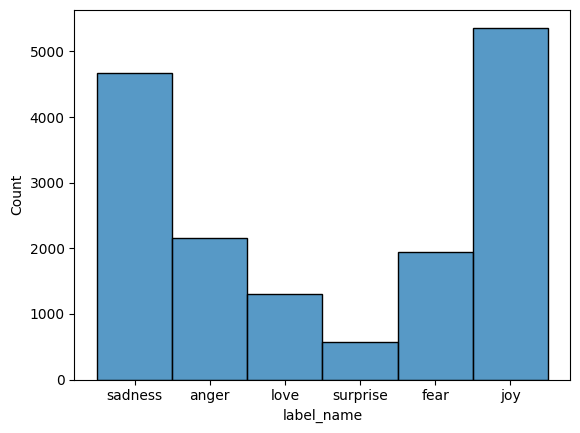

In [ ]:
import seaborn as sns
sns.histplot(df["label_name"])

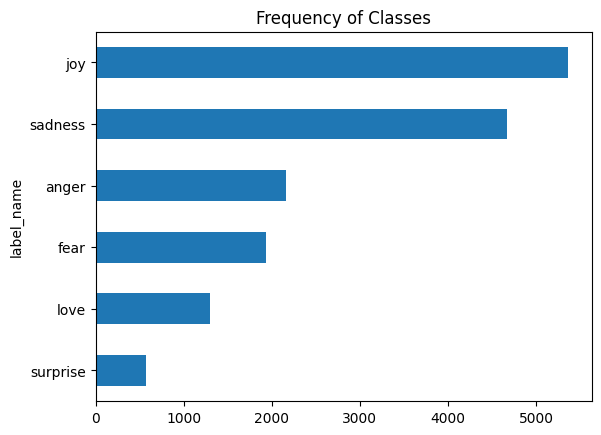

In [ ]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

## Ways to deal with imbalance data

- Randomly oversample the minority class.

- Randomly undersample the majority class.
a
- Gather more labeled data from the underrepresented classes

# How long are our tweets?


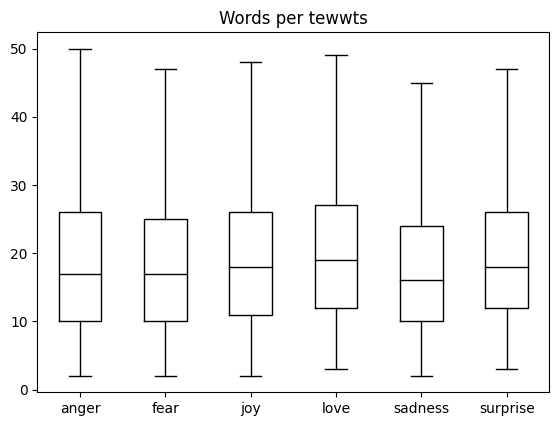

In [ ]:
df["Words per tewwts"] = df['text'].str.split().apply(len)
df.boxplot(column="Words per tewwts", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
# reset the output format of our dataset since we don’t need the DataFrame format anymore:
emotions.reset_format()

# Form text to Tokens


## Character Tokenization


In [ ]:
text = "Tokenizating text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)


['T', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [ ]:
token2idx = {ch:idx for idx, ch in  enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [ ]:
input_ids = [token2idx[ch] for ch in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 6, 17, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [ ]:
# OHE

categorical_df = pd.DataFrame(
    {
        "Name": ['BumbleBee', "Magatron", "Optimus Prime"],
        "lable_ID": [0,1,2]
    }
)

categorical_df

,Name,lable_ID
0,BumbleBee,0
1,Magatron,1
2,Optimus Prime,2


In [ ]:
pd.get_dummies(categorical_df["Name"], dtype="int")

,BumbleBee,Magatron,Optimus Prime
0,1,0,0
1,0,1,0
2,0,0,1


In [ ]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape


torch.Size([40, 20])

In [ ]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")


Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Word Tokenization

In [ ]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizating', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


## Subword Tokenization

In [ ]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Another way to load a specific tokenizer
from transformers import DistilBertTokenizer

distilber_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)


In [ ]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 21335, 3436, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
# Convert input_ids to tokens
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##iza', '##ting', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [ ]:
# Convert input_ids to string
decoded_text = tokenizer.decode(encoded_text.input_ids)
print(decoded_text)

# Convert tokens to string
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizating text is a core task of nlp. [SEP]
[CLS] tokenizating text is a core task of nlp. [SEP]


In [ ]:
# AutoTokenizer class also has several attributes that provide information about the tokenizer
print(tokenizer.vocab_size)
print(tokenizer.model_max_length) # Maximum context size
print(tokenizer.model_input_names)

30522
512
['input_ids', 'attention_mask']


## Tokenizing the whole Dataset

In [ ]:
def tokenization(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
print(tokenization(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
print(tokenizer.decode(tokenization(emotions["train"][:2])["input_ids"][0]))

[CLS] i didnt feel humiliated [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
emotions_encoded = emotions.map(tokenization, batched=True, batch_size=None)

In [ ]:
emotions_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

In [ ]:
print(emotions_encoded['train'][0])

{'text': 'i didnt feel humiliated', 'label': 0, 'input_ids': [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


# Traning a Text Classifier

## Two ways to train a model
1. feature extraction
2. Fine-tuning

### Feature Extraction

In [ ]:
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

#### Extracting the last hidden state


##### retrieve the last hidden states for a single string

In [ ]:
text = "This is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f'Input tensor shape: {inputs["input_ids"].size()}') # [batch_size, n_tokens]

Input tensor shape: torch.Size([1, 6])


In [ ]:
inputs = {k:v.to(device) for k,v in inputs.items()}
print(inputs)
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}
BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [ ]:
outputs.last_hidden_state.shape

torch.Size([1, 6, 768])

In [ ]:
# hidden state of [CLS] token
# A common practice to use as input feature
outputs.last_hidden_state[:, 0].shape

torch.Size([1, 768])

##### retrieve the last hidden states for whole datasets

In [ ]:
def extract_hidden_states(batch):
    # place model into gpu
    inputs = {k:v.to(device) for k,v in batch.items()
             if k in tokenizer.model_input_names}
    # Extract last hidden state
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()} # place the final hidden state back on the CPU as a NumPy array


In [ ]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
emotion_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotion_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

#### Creating a feature matrix

In [ ]:
import numpy as np

X_train = np.array(emotion_hidden['train']['hidden_state'])
X_valid = np.array(emotion_hidden['validation']['hidden_state'])
y_train = np.array(emotion_hidden['train']['label'])
y_valid = np.array(emotion_hidden['validation']['label'])

print(X_train.shape, X_valid.shape)

(16000, 768) (2000, 768)


##### Visualizing the training set

In [ ]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)

# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

# Create a DataFrame of 2D embeddings
df_embed = pd.DataFrame(mapper.embedding_, columns=['X', "Y"])
df_embed['label'] = y_train
df_embed.head()

,X,Y,label
0,4.401354,6.313622,0
1,-3.114139,5.301487,0
2,5.128068,2.824505,3
3,-2.264199,3.440344,2
4,-3.434177,3.510283,3


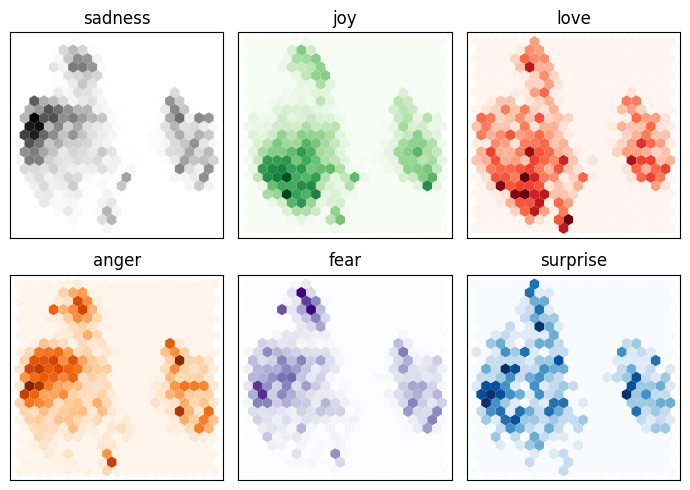

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Greens", "Reds", "Oranges", "Purples", "Blues"]
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_embed.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()



#### Training a simple classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.634

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()


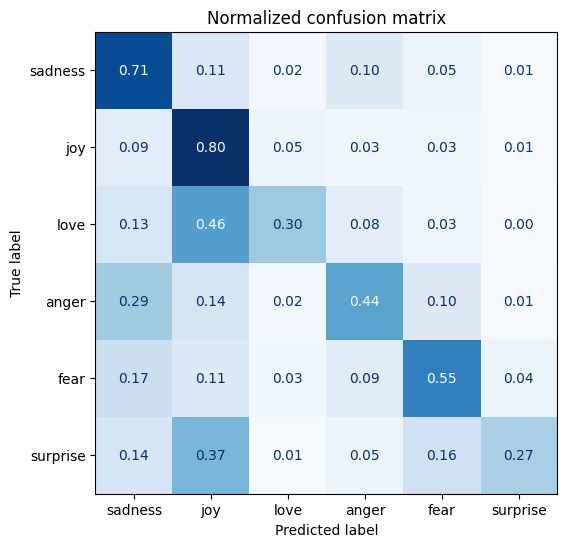

In [ ]:
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels=labels)

### Fine-tuning


#### Loading a pretrainred model

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Defining the performance metrics

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    """
    This function receives an EvalPrediction object (which is a named
    tuple with predictions and label_ids attributes) and needs to return a dictionary
    that maps each metric’s name to its value
    """
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}



#### Training the model

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"

# Set up the training arguments
training_args = TrainingArguments(
    output_dir=model_name,                # Directory to save the model checkpoints
    num_train_epochs=2,                   # Number of epochs to train for
    learning_rate=2e-5,                   # Learning rate for optimization
    per_device_train_batch_size=batch_size,  # Batch size per device (GPU/CPU) during training
    per_device_eval_batch_size=batch_size,   # Batch size per device during evaluation
    weight_decay=0.01,                    # Regularization to prevent overfitting
    eval_strategy="epoch",                # Evaluate the model at the end of each epoch
    disable_tqdm=False,                   # Whether to show a progress bar (False means show it)
    logging_steps=logging_steps,          # Log once every few steps, calculated above
    push_to_hub=True,                     # Push the model to Hugging Face's Model Hub after training
    log_level="error",                    # Only log errors, suppress warnings and other logs
)


In [ ]:
trainer = Trainer(
    model=model,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    tokenizer=tokenizer,
    args=training_args
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.768200,0.292668,0.911500,0.910678
2,0.235700,0.207093,0.929500,0.929385


TrainOutput(global_step=500, training_loss=0.501924919128418, metrics={'train_runtime': 243.9129, 'train_samples_per_second': 131.194, 'train_steps_per_second': 2.05, 'total_flos': 720342861696000.0, 'train_loss': 0.501924919128418, 'epoch': 2.0})

In [ ]:
preds_outputs = trainer.predict(emotions_encoded["validation"])

In [ ]:
preds_outputs.metrics

{'test_loss': 0.20709268748760223,
 'test_accuracy': 0.9295,
 'test_f1': 0.9293845029841648,
 'test_runtime': 4.098,
 'test_samples_per_second': 488.041,
 'test_steps_per_second': 7.809}

In [ ]:
print(preds_outputs)

PredictionOutput(predictions=array([[ 4.5517883 , -0.5988764 , -0.7526818 , -0.82201755, -0.9442776 ,
        -1.5918897 ],
       [ 4.4939218 , -0.69973713, -1.2853856 , -0.71613795, -0.54013765,
        -1.5240229 ],
       [-1.1988561 ,  2.3361733 ,  2.7129724 , -1.0347301 , -1.7864211 ,
        -1.6148938 ],
       ...,
       [-1.4364271 ,  4.527886  ,  0.4394572 , -1.3225529 , -1.4892223 ,
        -1.0866153 ],
       [-1.4216291 ,  2.6586432 ,  2.8000045 , -1.3040527 , -1.6494656 ,
        -1.2989817 ],
       [-1.4543439 ,  4.475235  , -0.16560383, -1.7468468 , -1.3564649 ,
        -0.23225656]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.20709268748760223, 'test_accuracy': 0.9295, 'test_f1': 0.9293845029841648, 'test_runtime': 4.098, 'test_samples_per_second': 488.041, 'test_steps_per_second': 7.809})


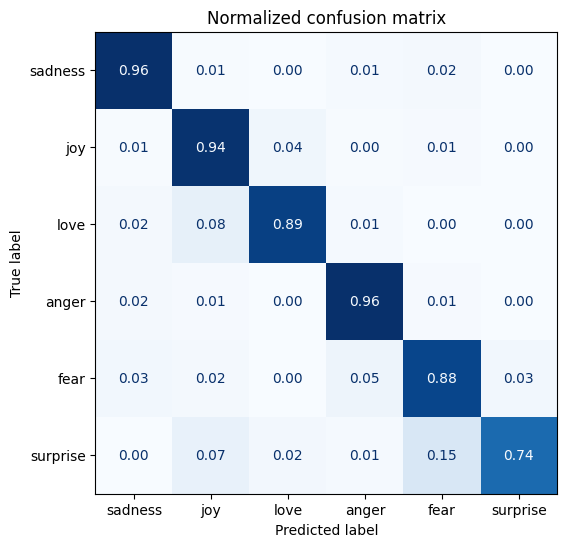

In [ ]:
import numpy as np
y_preds = np.argmax(preds_outputs.predictions, axis=1)
plot_confusion_matrix(y_preds, y_valid, labels=labels)

#### Fine tune with Keras

In [ ]:
from transformers import TFAutoModelForSequenceClassification

num_labels = 6
tf_model = (TFAutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels))

tokenizer_column = tokenizer.model_input_names

tf_train_datasets = emotions_encoded['train'].to_tf_dataset(
    columns=tokenizer_column, label_cols=["label"], shuffle=True,
    batch_size=batch_size
)

tf_eval_datatets = emotions_encoded["validation"].to_tf_dataset(
    columns=tokenizer_column, label_cols=["label"], shuffle=False,
    batch_size=batch_size
)

import tensorflow as tf

tf_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

tf_model.fit(tf_train_datasets, validation_data=tf_eval_datatets, epochs=2)


/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


Epoch 1/2
250/250 [==============================] - 169s 572ms/step - loss: 0.5285 - sparse_categorical_accuracy: 0.8152 - val_loss: 0.2019 - val_sparse_categorical_accuracy: 0.9235
Epoch 2/2
250/250 [==============================] - 138s 551ms/step - loss: 0.1423 - sparse_categorical_accuracy: 0.9390 - val_loss: 0.1281 - val_sparse_categorical_accuracy: 0.9420


In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    inputs = {k: v.to(device) for k, v in batch.items()
    if k in tokenizer.model_input_names}
    with torch.no_grad():
        outputs = model(**inputs)
        pred_labels = torch.argmax(outputs.logits, axis=1)
        loss = cross_entropy(outputs.logits, batch["label"].to(device), reduction="none")

    return {"loss": loss.cpu().numpy(),
            "predected_label": pred_labels.cpu().numpy()}

In [ ]:
emotions_encoded.set_format("torch",
columns=["input_ids", "attention_mask", "label"])

emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions_encoded["validation"]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'loss', 'predected_label'],
    num_rows: 2000
})

In [ ]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "loss", "predected_label"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predected_label"] = df_test["predected_label"].apply(label_int2str)


In [ ]:
df_test.sort_values("loss", ascending=False)

,text,label,loss,predected_label
882,i feel badly about reneging on my commitment t...,love,5.446126,sadness
1963,i called myself pro life and voted for perry w...,joy,5.439407,sadness
1801,i feel that he was being overshadowed by the s...,love,5.303423,sadness
1870,i guess i feel betrayed because i admired him ...,joy,5.119614,sadness
177,im sure much of the advantage is psychological...,sadness,5.099208,joy
...,...,...,...,...
632,i feel he is an terrific really worth bet,joy,0.014566,joy
716,im feeling pretty cool calm and collected and ...,joy,0.014544,joy
1873,i feel practically virtuous this month i have ...,joy,0.014523,joy
1205,i log on feeling vaguely sociable and after a ...,joy,0.013846,joy


### Saving the model

In [ ]:
# trainer.push_to_hub(commit_message="Training complete")

events.out.tfevents.1727009275.f8e47b3a037f.19051.0:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/aman155/distilbert-base-uncased-finetuned-emotion/commit/e0ae0810a58244ada25ef799f7ef7ab2cb2b976f', commit_message='Training complete', commit_description='', oid='e0ae0810a58244ada25ef799f7ef7ab2cb2b976f', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
from transformers import pipeline

model_id = "aman155/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
custom_tweer = "I saw a movie today and it was really exciting"
preds = classifier(custom_tweer, return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'LABEL_0', 'score': 0.0039588469080626965}, {'label': 'LABEL_1', 'score': 0.9665506482124329}, {'label': 'LABEL_2', 'score': 0.005348994862288237}, {'label': 'LABEL_3', 'score': 0.0027918857522308826}, {'label': 'LABEL_4', 'score': 0.006555994972586632}, {'label': 'LABEL_5', 'score': 0.014793645590543747}]]


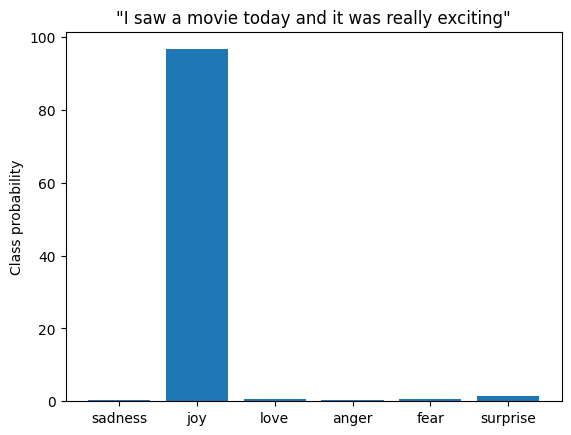

In [ ]:
print(preds)
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color="C0")
plt.title(f'"{custom_tweer}"')
plt.ylabel("Class probability")
plt.show()